In [2]:
!tail merged_data_v4.csv

@DouglasLNorton @RealMAGASteve @ricktator417 @CoreyLMJones @RealEagleWings @IWillRedPillU @RodStryker @securefreedom @thebradfordfile @DonnaWR8 @MICHELL59952525 @mike_Zollo @Boyd_2650 I had to check your page &amp; see whether you were cleverly using   or one of these complete jackasses...very nice to see youre the former.|None|1
@MultaniSaint No I told her its a terrible place with mean   people and she wants nothing to do with it|None|1
Rather than the usual  , ridicule, shame, and assumption that people have ill intent. Sometimes people screw up. Sometimes people think they are doing enough and are mistaken. Sometimes they need help. https://t.co/aetd8D2TSr|None|1
@schristakos @TenticalsIn @crypt_ghost @hortaun15 @Troll_Master101 @Unpersuaded112 @Apple Yea that was   and pubg isn’t that good of a game tbh|None|1
@Ayanfx09 @hshaban The internet desperately needs a   / snark / parody font. &amp; not Comic Sans, either.|None|1
@asteven79 @JinxTheSavage @Galeon_98 @KOSDFF Yes I know im 

In [5]:
from __future__ import print_function
from __future__ import division
import collections
import nltk
import numpy as np
from nltk.tokenize.casual import TweetTokenizer
from w266_common import utils, vocabulary
np.random.seed(266)

import re

In [34]:
import csv
tokenizer = TweetTokenizer()
x_data = []
labels = []
sentences = []
contexts = []   
x_contexts = []
  
with open('merged_data_v3.csv', 'r') as csvfile:
    linereader = csv.reader(csvfile, delimiter = '|')
    for i, row in enumerate(linereader):
        if i == 0:
            continue
        sentence, context, sarcasm = row
    
        if context in ['nan', 'none',None]:
            context = 'no_context'
        else: pass
        sentence = re.sub("RT @[^\s]+:", "retweet", sentence)
        sentences.append(sentence)
        contexts.append(str(context))
        x_tokens = utils.canonicalize_words(tokenizer.tokenize(sentence))
        context_tokens = utils.canonicalize_words(tokenizer.tokenize(context))
        x_data.append(x_tokens)
        x_contexts.append(context_tokens)
        labels.append(int(sarcasm))


#rng = np.random.RandomState(5)
#rng.shuffle(x_data)  # in-place
#train_split_idx = int(0.7 * len(labels))
#test_split_idx  = int(0.9 * len(labels))

shuffle_indices = np.random.permutation(np.arange(len(labels)))
train_split_idx = int(0.6 * len(labels))
test_split_idx  = int(0.9 * len(labels))

train_indices = shuffle_indices[:train_split_idx]
validation_indices = shuffle_indices[train_split_idx:test_split_idx]
test_indices = shuffle_indices[test_split_idx:]


train_sentences = np.array(x_data)[train_indices]
train_contexts = np.array(x_contexts)[train_indices]
train_labels= np.array(labels)[train_indices] 

validation_sentences = np.array(x_data)[validation_indices]
validation_labels = np.array(labels)[validation_indices]
validation_contexts = np.array(x_contexts)[validation_indices]

test_sentences = np.array(x_data)[test_indices]  
test_contexts = np.array(x_contexts)[test_indices]
test_labels = np.array(labels)[test_indices]  

In [35]:
train_indices.shape

(5235,)

In [36]:
train_sentences.shape

(5235,)

In [37]:
train_contexts.shape

(5235,)

In [32]:
np.unique(x_contexts)

array([list(['(', '(', '(', 'shienara', ')', ')', ')', 'on', 'twitter', ':', 'i', 'take', 'the', 'items', ',', 'tell', 'her', 'i', '’', 'll', 'do', 'it', 'tomorrow', ',', 'which', 'was', 'yesterday', ',', 'and', 'so', 'i', 'did', '.', 'HASHTAG', 'while', 'feeling', 'extremely', 'frustrated', 'at', 'this', 'point', 'b', '/', 'c', 'it', '’', 's', 'starting', 'to', 'feel', 'like', 'targeted', 'harassment', '.']),
       list(['*', '*', '*', 'has', 'DGDG.DG', 'm', 'followers', '..', 'yet', 'the', 'world', 'population', 'is', 'only', '7m', '!', 'i', 'd', 'like', 'to', 'see', 'armeries', 'try', 'explain', 'this', '!', 'pic.twitter.com/qgmyleyvrv']),
       list(['*', 'i', 'do', 'a', 'complex', 'life', 'saving', 'surgery', 'with', 'no', 'post', 'operative', 'complications', '.', '*', 'patient', 'gives', 'low', 'score', 'on', 'care', 'survey', 'because', 'he', 'didn', '’', 't', 'like', 'the', 'view', 'from', 'his', 'window', '.', '*', 'medicare', 'withholds', 'part', 'of', 'payment', 'for', 'l

In [78]:
###  EDA


%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def find_substr(sentence, sub_sent):
    return list(map(lambda x:' '.join(sub_sent) in ' '.join(x),sentence))

import re

def topic_finder(sentence):
    #pattern = r'#([0-9a-zA-Z]*)\b'
    pattern = r'\b(HASHTAG)\b'
    return re.findall(pattern,' '.join(sentence))

#sent_list = test_sentences[confusion['false_negative']]
def count_topics(sent_list):
    list_o_list = list(map(lambda x: topic_finder(x),sent_list))
    flatten_list = [l  for sublist in list_o_list for l in sublist]

    storage_dict = {}


    for i in flatten_list:
        if i not in storage_dict.keys():
            storage_dict.update({i:1})
        else: 
            storage_dict[i]+=1
    return storage_dict, list_o_list, flatten_list

def print_n_confident_examples(test_sentences,test_labels,y_pred, n = 10):
    false_negative = (y_pred != test_labels) & (test_labels == 1)
    test_sentences_fn = test_sentences[false_negative]
    index_n_fn = np.argsort(nb.predict_proba(x_test_sparse[false_negative])[:,0])[sum(false_negative)-(n+1):]
    print('\n\nTop '+str(n)+' false negatives examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_fn[index_n_fn]))

    false_positive = (y_pred != test_labels) & (test_labels == 0)
    test_sentences_fp = test_sentences[false_positive]
    index_n_fp = np.argsort(nb.predict_proba(x_test_sparse[false_positive])[:,1])[sum(false_positive)-(n+1):]
    print('\n\nTop '+str(n)+' false positive examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_fp[index_n_fp]))

    true_negative = (y_pred == test_labels) & (test_labels == 0)
    test_sentences_tn = test_sentences[true_negative]
    index_n_tn = np.argsort(nb.predict_proba(x_test_sparse[true_negative])[:,0])[sum(true_negative)-(n+1):]
    print('\n\nTop '+str(n)+' true negative examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_tn[index_n_tn]))

    true_positive = (y_pred == test_labels) & (test_labels == 1)
    test_sentences_tp = test_sentences[true_positive]
    index_n_tp = np.argsort(nb.predict_proba(x_test_sparse[true_positive])[:,1])[sum(true_positive)-(n+1):]

    print('\n\nTop '+str(n)+' true positive examples.\n')
    list(map(lambda x: print(' '.join(x)),test_sentences_tp[index_n_tp]))
    
    return {'false_negative':false_negative, 'false_positive':false_positive, 'true_negative':true_negative, 'true_positive':true_positive}

def histo_ht_use_count(ht_reference_count, sub_title=''):
    range_ = min(ht_reference_count) , max(ht_reference_count)

    bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

    plt.hist(ht_reference_count, bins =bin_ )

    plt.xlabel('Number of Hashtags Used')
    plt.ylabel('Tweet Count')
    plt.title('Histogram of Number of Tweets Utilized\n'+sub_title)
    #plt.axis([range_[0]-0.5,range_[1]+0.5,])
    plt.grid(True)

    plt.show()

In [39]:
vocab = vocabulary.Vocabulary(utils.flatten(train_sentences),8000)
x_ids = vocab.words_to_ids(train_sentences[0])
print("x_ids =", vocab.word_to_id)
print(x_ids)

x_ids = {'cover-up': 4953, 'website': 420, 'opening': 482, 'announcement': 1818, 'unconditional': 4954, 'division': 4110, 'robotics': 2481, 'passwords': 3209, 'child': 1219, 'backs': 3283, 'inv': 4113, 'need': 136, 'mats': 4956, 'enter': 179, 'xd': 2868, 'light': 1391, 'reason': 445, 'pushing': 974, 'earning': 4959, 'yeesh': 4960, 'gotchagood': 4961, 'likelike': 4962, 'cum': 2824, 'entering': 1664, 'survive': 2240, 'associated': 4115, 'getaway': 3285, '∩': 3286, 'self': 1990, 'mugs': 4118, 'burial': 4964, 'caruthersville': 4965, 'concerning': 4966, 'luckily': 6928, 'really': 122, 'been': 134, 'accommodate': 4968, 'weather': 1261, 'ordways': 5045, 'rounds': 2869, 'china': 1359, 'mini': 3287, 'wont': 1360, 'ss': 3288, 'ogr': 7708, 'cripple': 4970, 'dmd': 4971, 'friend': 446, 'liked': 2241, 'heartwarming': 7258, 'dapps': 4972, 'uploaded': 2676, 'came': 878, '😩': 1991, 'shores': 4974, 'riiiiiight': 7947, 'back': 165, 'calendars': 4976, 'cesaro': 7367, 'diversity': 3290, 'meh': 2242, '😔': 5

In [79]:
train_dict_, train_ll_, train_flatl_ = count_topics(train_sentences)


In [80]:
train_sentences

array([list(['retweet', 'put', 'your', 'heart', 'aside', '.', 'duty', 'first', '.', 'but', ',', 'when', 'fulfilling', 'your', 'duty', ',', 'put', 'your', 'heart', 'into', 'it', '.', 'it', 'helps', '.', 'HASHTAG', 'HASHTAG', '…']),
       list(['were', 'HASHTAG', '!', 'read', 'about', 'our', 'latest', 'HASHTAG', 'opening', 'here', ':', 'finance', 'manager', '-', 'LINK', 'HASHTAG', 'HASHTAG', ',', 'wales', 'HASHTAG']),
       list(['retweet', 'no', 'way', '!', '!', '!', 'a', 'quality', 'outstanding', 'role', 'model', 'like', 'him', 'in', 'trouble', '.', 'i', 'don', '’', 't', 'believe', 'it', '.', 'HASHTAG', 'LINK']),
       ...,
       list(['today', 'on', 'HASHTAG', 'catholics', 'all', 'over', 'the', 'world', 'have', 'the', 'super', 'enjoyable', 'task', 'of', 'yelling', 'crucify', 'him', '!', 'crucify', 'him', '!', 'HASHTAG', 'HASHTAG']),
       list(['post', 'the', 'naked', 'truth', 'or', 'make', 'friends', '.', 'join', 'us', 'and', 'share', 'your', 'sexual', 'interests', '?', 'our', '

In [55]:
# list_of_train_ids = list(map(vocab.words_to_ids, train_sentences))
# print(list_of_train_ids[0:20])


# list_of_validation_ids = list(map(vocab.words_to_ids, validation_sentences))

# list_of_test_ids = list(map(vocab.words_to_ids, test_sentences))


In [56]:
collections.Counter(list_of_train_ids[0])

NameError: name 'list_of_train_ids' is not defined

In [57]:
from scipy.sparse import csr_matrix 
def sparsify_data(list_of_ids):
    row_indices = []
    col_indices = []
    values = []
    rows = len(list_of_ids)

    for row, x_ids in enumerate(list_of_ids):
        x_fdict = collections.Counter(x_ids)
        for wordid, count in x_fdict.items():
            row_indices.append(row)       
            col_indices.append(wordid)  # column is word id
            values.append(count)        # value is count
    x_sparse = csr_matrix((values, (row_indices, col_indices)),
                              shape=[rows, vocab.size])
    return x_sparse

In [58]:
x_train_sparse = sparsify_data(list_of_train_ids)
x_validation_sparse = sparsify_data(list_of_validation_ids)
x_test_sparse = sparsify_data(list_of_test_ids)


NameError: name 'list_of_train_ids' is not defined

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

nb = MultinomialNB(alpha =  1)
nb.fit(x_train_sparse, train_labels)
y_pred = nb.predict(x_test_sparse)





f1 = f1_score(test_labels, y_pred)
acc = accuracy_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
print(" acc: {:.02%}, recall: {:.02%}, precision: {:.02%}, f1: {:.02%},".format(acc, recall, precision, f1))


NameError: name 'x_train_sparse' is not defined

In [60]:
linear_weights = nb.feature_log_prob_[1,:] - nb.feature_log_prob_[0,:]  # populate this with actual values

top_negative_features = np.argsort(linear_weights)[0:40]
top_positive_features = np.argsort(-linear_weights)[0:40]


AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [61]:
print("Most negative features:")
for idx in top_negative_features:
    print("  {:s} ({:.02f})".format(vocab.id_to_word[idx], 
                                    linear_weights[idx]))
print("")
print("Most positive features:")
for idx in top_positive_features:
    print("  {:s} ({:.02f})".format(vocab.id_to_word[idx], 
                                    linear_weights[idx]))
    


Most negative features:


NameError: name 'top_negative_features' is not defined

###### 

In [62]:
confusion = print_n_confident_examples(test_sentences,test_labels,y_pred, n = 10)

NameError: name 'y_pred' is not defined

In [63]:
# retweet counter
sub_sent =['rt', 'ACCOUNT', ':']

print(
    'retweets in false_negative:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['false_negative']], sub_sent))/sum(confusion['false_negative'])),
    '\nretweets in false_positive:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['false_positive']], sub_sent))/sum(confusion['false_positive'])),
    '\nretweets in true_negative:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['true_negative']], sub_sent))/sum(confusion['true_negative'])),
    '\nretweets in true_positive:{0:.0f}%"'.format(100*sum(find_substr(test_sentences[confusion['true_positive']], sub_sent))/sum(confusion['true_positive']))
    )


print('\n')
dict_ , list_list_, flat_=count_topics(sent_list)

ht_reference_count =  [len(i) for i in list_list_]

print('\n')

histo_ht_use_count(ht_reference_count, sub_title='Test Data')

NameError: name 'confusion' is not defined

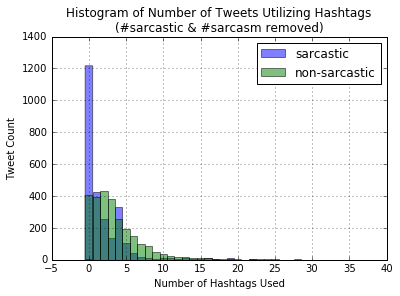

In [81]:
###  EDA  Prospective

sarcastic_sents = train_sentences[train_labels == 1]
non_sarcastic_sents = train_sentences[train_labels == 0]
    

# sub_sent =['rt', 'ACCOUNT', ':']

# print(
#     'retweets in false_negative:{0:.0f}%"'.format(100*sum(find_substr(sarcastic_sents, sub_sent))/sarcastic_sents.shape[0]),
#     '\nretweets in false_positive:{0:.0f}%"'.format(100*sum(find_substr(non_sarcastic_sents, sub_sent))/non_sarcastic_sents.shape[0])
#     )


print('\n')


train_dict_s, train_ll_s, train_flatl_s = count_topics(sarcastic_sents)

train_dict_ns, train_ll_ns, train_flatl_ns = count_topics(non_sarcastic_sents)

ht_reference_count_s =  [len(i) for i in train_ll_s]

ht_reference_count_ns =  [len(i) for i in train_ll_ns]

print('\n')

range_ = min(ht_reference_count_s+ht_reference_count_ns) , max(ht_reference_count_s+ht_reference_count_ns)

bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

plt.hist(ht_reference_count_s, bins =bin_ , label = 'sarcastic',alpha = 0.5)
plt.hist(ht_reference_count_ns, bins =bin_, label = 'non-sarcastic' ,alpha = 0.5)

plt.xlabel('Number of Hashtags Used')
plt.ylabel('Tweet Count')
plt.title('Histogram of Number of Tweets Utilizing Hashtags\n(#sarcastic & #sarcasm removed)')
#plt.axis([range_[0]-0.5,range_[1]+0.5,])
plt.grid(True)

plt.legend(loc='upper right')
plt.show()


In [68]:
np.unique(ht_reference_count_s)

array([0])

#### Caption 
 The above figure shows the distribution of tweets across the number of hashtags utilized to reference topics.  The above distribution is on the training data after the #sarcasm and #sarcastic labels were removed from the sentences.  

####  Verbiage

We see that for sarcastic tweets there is a right-skewed in the distribution of number of hashtags utilized/referenced in a given tweet.  This means that for any sarcastic tweets, we expect the user will be less likely to utilize additional tweets to accompany accompany .  In the non-sarcastic distribution there is less of a skew in the distribution with a median value around 4 hashtags in a tweet, of course #sarcastic or #sarcasm was not removed from this set of tweet still, we that generally non-sarcastic tweets having a combination of topics referenced.  



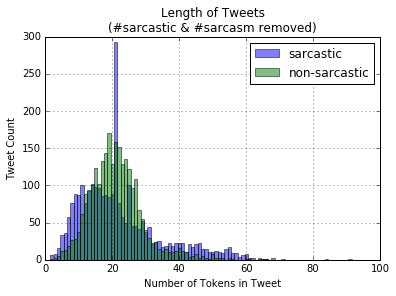

In [82]:
sarcastic_sents = train_sentences[train_labels == 1]
non_sarcastic_sents = train_sentences[train_labels == 0]

length_s = list(map(lambda l: len(l), sarcastic_sents))

length_ns = list(map(lambda l: len(l), non_sarcastic_sents))

print('\n')

range_ = min(length_s+length_ns) , max(length_s+length_ns)

bin_ = np.array(range(range_[0]-1, range_[1]+1)) +0.5

plt.hist(length_s, bins =bin_ , label = 'sarcastic',alpha = 0.5)
plt.hist(length_ns, bins =bin_, label = 'non-sarcastic' ,alpha = 0.5)

plt.xlabel('Number of Tokens in Tweet')
plt.ylabel('Tweet Count')
plt.title('Length of Tweets\n(#sarcastic & #sarcasm removed)')
#plt.axis([range_[0]-0.5,range_[1]+0.5,])
plt.grid(True)

plt.legend(loc='upper right')
plt.show()


#### Caption 
 The above figure shows the distribution of tweet-length or number of tokens in a given tweet.  The above distribution is on the training data after the #sarcasm and #sarcastic labels were removed from the sentences.  

####  Verbiage
By comparing the distribution of tweet length for sarcastic and non-sarcastic tweets we see that there is a higher concentration of tweets with fewer number of tokens for the sarcastic class. The tweet length for non-sarcastic tweets is centered around 20 tokens.  Since the set of hashtags

In [141]:
np.mode(length_s)

AttributeError: module 'numpy' has no attribute 'mode'

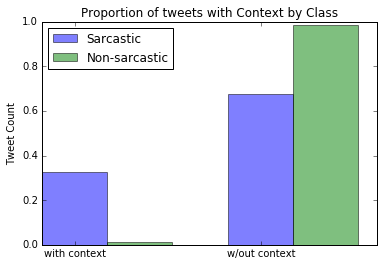

In [140]:
no_context_element = 'no_context'

sarcastic_context = [i for i in train_contexts[train_labels == 1] if i != [no_context_element]]
sarcastic_nocont = [i for i in train_contexts[train_labels == 1]  if i == [no_context_element]]
non_sarcastic_context = [i for i in train_contexts[train_labels == 0]  if i != [no_context_element]]
non_sarcastic_nocont =[i for i in train_contexts[train_labels == 0]  if i == [no_context_element]]

print('\n')

N = 2

sarcastic_counts = np.array([len(sarcastic_context),len(sarcastic_nocont)])/len(sarcastic_context+sarcastic_nocont)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, sarcastic_counts, width, color='b', bottom=0,alpha = 0.5)


non_sarcastic_counts = np.array([len(non_sarcastic_context),len(non_sarcastic_nocont)])/len(non_sarcastic_context+non_sarcastic_nocont)

p2 = ax.bar(ind + width, non_sarcastic_counts, width,
            color='g', bottom=0,alpha = 0.5)


ax.set_title('Proportion of tweets with Context by Class')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('with context', 'w/out context'))


plt.ylabel('Tweet Count')
ax.legend((p1[0], p2[0]), ('Sarcastic', 'Non-sarcastic'),loc='best')

plt.show()

In [ ]:




p2 = ax.bar(ind + width, womenMeans, width,
            color='y', bottom=0*cm, yerr=womenStd)



ax.legend((p1[0], p2[0]), ('Men', 'Women'))
ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

#### Caption 

####  Verbiage



In [129]:
np.array([len(sarcastic_context),len(sarcastic_nocont)])/len(sarcastic_context+sarcastic_nocont)


array([0.32409867, 0.67590133])

In [118]:
len(sarcastic_context) 

854

In [119]:
len(sarcastic_nocont)

1781

In [120]:
len(non_sarcastic_context) 

37

In [121]:
len(non_sarcastic_nocont)

2563